In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
data = pd.read_csv("/content/50_Startups.csv")

In [46]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


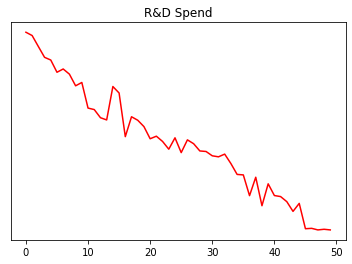

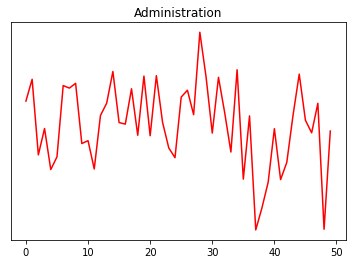

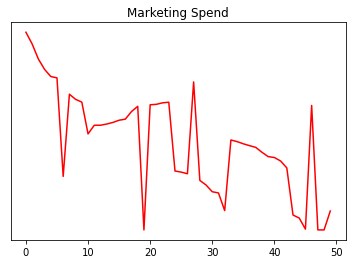

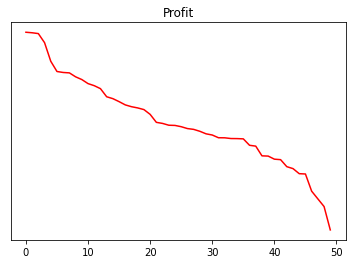

In [48]:
cols = ['R&D Spend', 'Administration', 'Marketing Spend','Profit']
for i in cols:
    plt.plot(data[i],"-r")
    plt.xticks()
    plt.yticks([])
    plt.title(i, fontdict=None, loc='center')
    plt.show()

In [19]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [27]:
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3])

ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(x)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state = 3)

In [38]:
x_test.shape

(10, 6)

In [87]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_acc = r2_score(y_test, lr_pred)
lr_acc

0.9442055210808207

In [88]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = r2_score(y_test, dt_pred)
dt_acc

0.891254847161985

In [89]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=0)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = r2_score(y_test, rf_pred)
rf_acc

0.9479167477725612

In [85]:
for i in range(1,6):
    polyfet = PolynomialFeatures(degree=i)
    xa = polyfet.fit_transform(x_train)
    model = LinearRegression()
    model.fit(xa,y_train)
    accuracy = model.score(xa,y_train)
    print('accuracy(R2) with degree_{} is -->  {}%'.format(i , round(accuracy*100,3)))

accuracy(R2) with degree_1 is -->  94.891%
accuracy(R2) with degree_2 is -->  96.309%
accuracy(R2) with degree_3 is -->  99.644%
accuracy(R2) with degree_4 is -->  100.0%
accuracy(R2) with degree_5 is -->  100.0%


In [97]:
polyfet = PolynomialFeatures(degree=2)
xa = polyfet.fit_transform(x_train)
model = LinearRegression()
model.fit(xa,y_train)
xb = polyfet.fit_transform(x_test)
pr_pred = model.predict(xb)
r2_score(y_test,pr_pred)


0.9535320485172037

In [101]:
test_data = [0,1,0,121212,232323,343434]
test_data_arr= np.array(test_data)
test_data_num= test_data_arr.reshape(1,-1)
prediction = rf.predict(test_data_num)
output = round(float(prediction),2)

In [102]:
output

149747.31

In [103]:
from sklearn.externals import joblib
joblib.dump(rf, "model.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.pkl']